In [1]:
# Copyright 2019-2020 Steven Mattis and Troy Butler

import numpy as np
import matplotlib.pyplot as plt
import dynamical_systems as ds
import ipywidgets as wd
from scipy.stats import gaussian_kde as GKDE
from math import *
from luq import *



In [2]:
plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'axes.linewidth': 2})

np.random.seed(123456)

In [ ]:
The model is the Sel'kov model for glycolysis, a process by which living cells breakdown sugar to obtain energy:
$$x' = -(x+b) + a \left(y + \frac{b}{a+b^2} \right) + (x+b)^2 \left(y + \frac{b}{a+b^2}\right)$$
$$y' = b-a\left(y+ \frac{b}{a+b^2}\right) - (x+b)^2 \left(y + \frac{b}{a+b^2}\right), $$
where $x$ and $y$ represent concentrations of ADP and F6P, respectively, and $a,b>0$.
The initial conditions are $x(0) = x_0 \in \mathbb{R}$ and $y(0) = y_0 \in \mathbb{R}$.

The system has Hopf Bifurcations at 
$$b = b_1(a) = \sqrt{(1-\sqrt{1-8a}-2a)/2}$$
and
$$b = b_2(a) = \sqrt{(1+\sqrt{1-8a}-2a)/2}.$$
If $b<b_1$, the origin is a stable focus. If $b_1 < b < b_2$, there is a stable periodic orbit.
If $b > b_2$ the origin is a stable focus.

The system is solved numerically using the RK45 method.

A ***true*** distribution of $a, b,  x_0$, and $y_0$ are defined by (non-uniform)
Beta distributions and used to generate a set of time series data.

An ***initial*** uniform distribution is assumed and updated by the true time series data.

In [3]:
# Uniformly sample the parameter samples to form a "prediction" or "test" set
num_samples = int(3E3)

param_range = np.array([[0.01, 0.124], # a
                       [0.05, 1.5]])  #b
ic_range = np.array([[1.0, 1.0],  # y_0
                     [1.0, 1.0]])  # x_0

params = np.random.uniform(size=(num_samples, 2))
params = param_range[:, 0] + (param_range[:, 1] - param_range[:, 0]) * params

ics = np.random.uniform(size=(num_samples, 2))
ics = ic_range[:, 0] + (ic_range[:, 1] - ic_range[:, 0]) * ics

# labels
param_labels = [r'$a$', r'$b$']
ic_labels = [r'$x_0$', r'$y_0$']

# Construct the predicted time series data
time_start = 2.0 #0.5
time_end = 6.5 #40.0
num_time_preds = int((time_end-time_start)*100)  # number of predictions (uniformly space) between [time_start,time_end]
times = np.linspace(time_start, time_end, num_time_preds)

# Solve systems
phys = ds.Selkov()
predicted_time_series = phys.solve(ics=ics, params=params, t_eval=times)

In [4]:
# Simulate an observed Beta distribution of time series data

num_obs = int(5E2)

true_a = 2
true_b = 2

params_obs = np.random.beta(size=(num_obs, 2), a=true_a, b=true_b)
params_obs = param_range[:, 0] + (param_range[:, 1] - param_range[:, 0]) * params_obs

ics_obs = np.random.beta(size=(num_obs, 2), a=true_a, b=true_b)
ics_obs = ic_range[:, 0] + (ic_range[:, 1] - ic_range[:, 0]) * ics_obs

# Solve system
observed_time_series = phys.solve(ics=ics_obs, params=params_obs, t_eval=times)

# Add noise if desired
with_noise = True
noise_stdev = 0.0125

if with_noise:
    observed_time_series += noise_stdev * np.random.randn(num_obs, times.shape[0])

In [5]:
# Use LUQ to learn dynamics and QoIs
learn = LUQ(predicted_time_series, observed_time_series, times)

# time array indices over which to use
time_start_idx = 0
time_end_idx = len(times) - 1#150 #120

# Clean data
learn.clean_data(time_start_idx=time_start_idx, time_end_idx=time_end_idx,
                 num_clean_obs=20, tol=5.0e-2, min_knots=3, max_knots=12)

0 4 0.1643256852753052
0 5 0.07318709105175686
0 6 0.06482547995570885
0 6 knots being used with error of 0.06482547995570885
1 4 0.15700192923875528
1 5 0.06902687945649676
1 6 0.04427394570434371
1 7 0.03561626003936255
1 7 knots being used with error of 0.03561626003936255
2 4 0.031906201196777256
2 5 0.017518985139675737
2 5 knots being used with error of 0.017518985139675737
3 4 0.15666277748495594
3 5 0.06654280558600265
3 6 0.04106791555091869
3 7 0.0349449202773806
3 7 knots being used with error of 0.0349449202773806
4 4 0.023043095048157533
4 5 0.013061892070130336
4 5 knots being used with error of 0.013061892070130336
5 4 0.02753384819677414
5 5 0.015516361508009023
5 5 knots being used with error of 0.015516361508009023
6 4 0.15539583405176158
6 5 0.06662270310237735
6 6 0.04159185869547664
6 7 0.03473807372690058
6 7 knots being used with error of 0.03473807372690058
7 4 0.03798528420472489
7 5 0.020462984275591286
7 5 knots being used with error of 0.020462984275591286
8

66 7 0.020348659250370875
66 7 knots being used with error of 0.020348659250370875
67 4 0.03995010337880845
67 5 0.022839765395395527
67 5 knots being used with error of 0.022839765395395527
68 4 0.05770243092012299
68 5 0.032152389375219886
68 6 0.020539197575657243
68 6 knots being used with error of 0.020539197575657243
69 4 0.03773148275985799
69 5 0.021302792725168957
69 5 knots being used with error of 0.021302792725168957
70 4 0.05766748394803565
70 5 0.0321997452118711
70 6 0.020357845442367094
70 6 knots being used with error of 0.020357845442367094
71 4 0.031391898749247395
71 5 0.017860021075844904
71 5 knots being used with error of 0.017860021075844904
72 4 0.08204038984137092
72 5 0.04581381388065872
72 6 0.02933180619761291
72 7 0.02029319953673303
72 7 knots being used with error of 0.02029319953673303
73 4 0.08254975600511555
73 5 0.06926539059716279
73 5 knots being used with error of 0.06926539059716279
74 4 0.16105688832573528
74 5 0.07061490865377454
74 6 0.0633580

130 6 0.06658893868872542
130 6 knots being used with error of 0.06658893868872542
131 4 0.15845819300720276
131 5 0.06881620930622517
131 6 0.06791921591838969
131 6 knots being used with error of 0.06791921591838969
132 4 0.04246064878583737
132 5 0.02426343219092767
132 5 knots being used with error of 0.02426343219092767
133 4 0.04499209483546717
133 5 0.02530242480890585
133 5 knots being used with error of 0.02530242480890585
134 4 0.047266232389627974
134 5 0.026205136676357776
134 6 0.016746928551593553
134 6 knots being used with error of 0.016746928551593553
135 4 0.055395985468402666
135 5 0.03084971131966053
135 6 0.019502573866291128
135 6 knots being used with error of 0.019502573866291128
136 4 0.032021876324194516
136 5 0.0182711357426843
136 5 knots being used with error of 0.0182711357426843
137 4 0.16202086369536498
137 5 0.07200841749410439
137 6 0.06371930154804722
137 6 knots being used with error of 0.06371930154804722
138 4 0.03219871562422525
138 5 0.0185884048

193 5 0.017888182233947426
193 5 knots being used with error of 0.017888182233947426
194 4 0.03295591958497082
194 5 0.018613490590113916
194 5 knots being used with error of 0.018613490590113916
195 4 0.05443240231236127
195 5 0.030966032921702993
195 6 0.01992996683381689
195 6 knots being used with error of 0.01992996683381689
196 4 0.03030941072965461
196 5 0.017531334060452753
196 5 knots being used with error of 0.017531334060452753
197 4 0.023443528358593705
197 5 0.013265322942968824
197 5 knots being used with error of 0.013265322942968824
198 4 0.158915505352235
198 5 0.06947133055435283
198 6 0.06262542466394586
198 6 knots being used with error of 0.06262542466394586
199 4 0.08211274117090069
199 5 0.043563767048562456
199 6 0.027447034724795923
199 6 knots being used with error of 0.027447034724795923
200 4 0.030180098327167452
200 5 0.017520398064041258
200 5 knots being used with error of 0.017520398064041258
201 4 0.029802230725034826
201 5 0.01662505898381254
201 5 kno

255 6 0.01757968017197685
255 6 knots being used with error of 0.01757968017197685
256 4 0.1607383119384943
256 5 0.07154823268957163
256 6 0.06334018202472358
256 6 knots being used with error of 0.06334018202472358
257 4 0.07690059494178235
257 5 0.04338368134838411
257 6 0.027818546494025258
257 6 knots being used with error of 0.027818546494025258
258 4 0.07822634523318119
258 5 0.043574378273474386
258 6 0.02900591252261012
258 6 knots being used with error of 0.02900591252261012
259 4 0.09067680345401047
259 5 0.05094548995923996
259 6 0.03244679669848573
259 7 0.02208400755348518
259 7 knots being used with error of 0.02208400755348518
260 4 0.054341642593320354
260 5 0.030352790996496654
260 6 0.019298349673867295
260 6 knots being used with error of 0.019298349673867295
261 4 0.05643473438080291
261 5 0.031333556757016705
261 6 0.01981971513891944
261 6 knots being used with error of 0.01981971513891944
262 4 0.051552856589039804
262 5 0.02880707648645848
262 6 0.0182655111985

319 4 0.05730553021192236
319 5 0.031990984599532424
319 6 0.020273687869129295
319 6 knots being used with error of 0.020273687869129295
320 4 0.16282550634747647
320 5 0.0714420375556994
320 6 0.06388903890353431
320 6 knots being used with error of 0.06388903890353431
321 4 0.09175094511907834
321 5 0.06701245392090899
321 6 0.03820900362733823
321 7 0.025727738885042335
321 7 knots being used with error of 0.025727738885042335
322 4 0.022776758152580248
322 5 0.01272986654896556
322 5 knots being used with error of 0.01272986654896556
323 4 0.08668182078828983
323 5 0.047438323957549024
323 6 0.029609082177327693
323 7 0.020433199897842428
323 7 knots being used with error of 0.020433199897842428
324 4 0.043339186605483665
324 5 0.024391506116669872
324 5 knots being used with error of 0.024391506116669872
325 4 0.10270858541750125
325 5 0.06613715327806054
325 6 0.03864938293935555
325 7 0.02668020637636818
325 7 knots being used with error of 0.02668020637636818
326 4 0.034082758

383 5 0.017429181188053592
383 5 knots being used with error of 0.017429181188053592
384 4 0.04926544541058501
384 5 0.027751965595663237
384 6 0.01766843885664595
384 6 knots being used with error of 0.01766843885664595
385 4 0.159158068169808
385 5 0.06631298770990815
385 6 0.039761776760747096
385 7 0.03495626629368652
385 7 knots being used with error of 0.03495626629368652
386 4 0.08744431280114134
386 5 0.04718313619328612
386 6 0.029443610356880284
386 7 0.020128853583750186
386 7 knots being used with error of 0.020128853583750186
387 4 0.0364433820214542
387 5 0.02037003396497358
387 5 knots being used with error of 0.02037003396497358
388 4 0.03468310692358649
388 5 0.0201367910036676
388 5 knots being used with error of 0.0201367910036676
389 4 0.055276612007566596
389 5 0.030652594789156818
389 6 0.019553094314010536
389 6 knots being used with error of 0.019553094314010536
390 4 0.15871849176963157
390 5 0.06879791423050913
390 6 0.04347725429864287
390 7 0.035748314186300

446 6 0.027910534987675487
446 7 0.019753836445385517
446 7 knots being used with error of 0.019753836445385517
447 4 0.10351254674645395
447 5 0.06605771797290187
447 6 0.03880368401101291
447 7 0.02686146681847369
447 7 knots being used with error of 0.02686146681847369
448 4 0.05686026333729091
448 5 0.0317104792380856
448 6 0.020195835098741715
448 6 knots being used with error of 0.020195835098741715
449 4 0.03365257901409628
449 5 0.018633742831094986
449 5 knots being used with error of 0.018633742831094986
450 4 0.05766273138863309
450 5 0.032269466153215416
450 6 0.020446055930727146
450 6 knots being used with error of 0.020446055930727146
451 4 0.04627745656253327
451 5 0.02553338986902111
451 5 knots being used with error of 0.02553338986902111
452 4 0.024166449359022735
452 5 0.01363080268951277
452 5 knots being used with error of 0.01363080268951277
453 4 0.039459616915634474
453 5 0.022717481238904175
453 5 knots being used with error of 0.022717481238904175
454 4 0.158

509 6 0.01708831094588011
509 6 knots being used with error of 0.01708831094588011
510 4 0.06902330162461531
510 5 0.03889360285406537
510 6 0.02514715375881492
510 6 knots being used with error of 0.02514715375881492
511 4 0.1708638510297161
511 5 0.07460199089032153
511 6 0.06730135128072098
511 6 knots being used with error of 0.06730135128072098
512 4 0.08091916025577209
512 5 0.06931216648461096
512 5 knots being used with error of 0.06931216648461096
513 4 0.08178085827740011
513 5 0.04385090666434807
513 6 0.028112067574201254
513 6 knots being used with error of 0.028112067574201254
514 4 0.0368465253437585
514 5 0.020317497707509638
514 5 knots being used with error of 0.020317497707509638
515 4 0.05054197247625599
515 5 0.02838460946697846
515 6 0.0180290308193469
515 6 knots being used with error of 0.0180290308193469
516 4 0.048966035221889505
516 5 0.027859787254160818
516 6 0.017971692694056726
516 6 knots being used with error of 0.017971692694056726
517 4 0.079571318294

574 4 0.07858901465967814
574 5 0.050368212840513134
574 6 0.03803752819990244
574 6 knots being used with error of 0.03803752819990244
575 4 0.16772941351545906
575 5 0.07432957940975644
575 6 0.06619792289003368
575 6 knots being used with error of 0.06619792289003368
576 4 0.04104069917364665
576 5 0.021830312835796565
576 5 knots being used with error of 0.021830312835796565
577 4 0.047842290712197484
577 5 0.026940377942611587
577 6 0.017135620350251693
577 6 knots being used with error of 0.017135620350251693
578 4 0.0516959918497356
578 5 0.02892760280305699
578 6 0.018401207669902303
578 6 knots being used with error of 0.018401207669902303
579 4 0.05358366979262431
579 5 0.02975469164704148
579 6 0.019047447499745414
579 6 knots being used with error of 0.019047447499745414
580 4 0.05494175798113663
580 5 0.030643955364947618
580 6 0.019534169169398395
580 6 knots being used with error of 0.019534169169398395
581 4 0.036339665834934955
581 5 0.021131749512758365
581 5 knots be

638 6 0.020474824391142375
638 6 knots being used with error of 0.020474824391142375
639 4 0.03271716268734347
639 5 0.01862117326245803
639 5 knots being used with error of 0.01862117326245803
640 4 0.038257531106742994
640 5 0.021559763820328978
640 5 knots being used with error of 0.021559763820328978
641 4 0.15632924046371896
641 5 0.0679337439989443
641 6 0.04302436245836527
641 7 0.035350063529474854
641 7 knots being used with error of 0.035350063529474854
642 4 0.022093332743364322
642 5 0.012394396322178543
642 5 knots being used with error of 0.012394396322178543
643 4 0.05749717921657005
643 5 0.03207618685859442
643 6 0.02039397600826665
643 6 knots being used with error of 0.02039397600826665
644 4 0.057026771699180336
644 5 0.031689948817620606
644 6 0.020237058589897834
644 6 knots being used with error of 0.020237058589897834
645 4 0.04706980295342504
645 5 0.02628732526685456
645 6 0.016709069962335798
645 6 knots being used with error of 0.016709069962335798
646 4 0.0

702 5 0.19517940975320694
702 6 0.03807633694685322
702 7 0.0244347782760922
702 7 knots being used with error of 0.0244347782760922
703 4 0.16446663814945076
703 5 0.07337350813590597
703 6 0.06486869734706786
703 6 knots being used with error of 0.06486869734706786
704 4 0.035502736782297324
704 5 0.020215144212124257
704 5 knots being used with error of 0.020215144212124257
705 4 0.05556813627814321
705 5 0.031003081841023013
705 6 0.01971551099481315
705 6 knots being used with error of 0.01971551099481315
706 4 0.045886253352086306
706 5 0.02519470834989427
706 5 knots being used with error of 0.02519470834989427
707 4 0.057301159511632095
707 5 0.03200723280170042
707 6 0.020255904832861535
707 6 knots being used with error of 0.020255904832861535
708 4 0.15613044128789713
708 5 0.06831477813878245
708 6 0.04356630079122739
708 7 0.03539758234107182
708 7 knots being used with error of 0.03539758234107182
709 4 0.08758249829349476
709 5 0.047339190662938097
709 6 0.02953245089141

765 4 0.04295989544320492
765 5 0.02428672837643949
765 5 knots being used with error of 0.02428672837643949
766 4 0.03886718810056543
766 5 0.021771720399465972
766 5 knots being used with error of 0.021771720399465972
767 4 0.041917187170560054
767 5 0.023947833268359548
767 5 knots being used with error of 0.023947833268359548
768 4 0.05250746314822912
768 5 0.029128322813577093
768 6 0.018650471054223006
768 6 knots being used with error of 0.018650471054223006
769 4 0.16634935923954952
769 5 0.07431742170119891
769 6 0.0656868344948024
769 6 knots being used with error of 0.0656868344948024
770 4 0.1595293335813197
770 5 0.07076109522457495
770 6 0.06283794174310386
770 6 knots being used with error of 0.06283794174310386
771 4 0.038765846298134794
771 5 0.021033199416244847
771 5 knots being used with error of 0.021033199416244847
772 4 0.052611166806798844
772 5 0.02989238353406805
772 6 0.01927308858294824
772 6 knots being used with error of 0.01927308858294824
773 4 0.0823140

828 5 0.017871946941284134
828 5 knots being used with error of 0.017871946941284134
829 4 0.039312387818664536
829 5 0.022359046417696697
829 5 knots being used with error of 0.022359046417696697
830 4 0.05607173295045724
830 5 0.03124531352157801
830 6 0.019983506268764474
830 6 knots being used with error of 0.019983506268764474
831 4 0.038119117498981496
831 5 0.021346615294272012
831 5 knots being used with error of 0.021346615294272012
832 4 0.1587217163984135
832 5 0.06669190428668176
832 6 0.04067231181716864
832 7 0.03505380554523177
832 7 knots being used with error of 0.03505380554523177
833 4 0.05160682737405678
833 5 0.028758658366894542
833 6 0.01822041688900793
833 6 knots being used with error of 0.01822041688900793
834 4 0.0225049895614333
834 5 0.012637653193292454
834 5 knots being used with error of 0.012637653193292454
835 4 0.047971722206704766
835 5 0.02703282511932342
835 6 0.017185821597447675
835 6 knots being used with error of 0.017185821597447675
836 4 0.03

893 5 0.04734280337446848
893 6 0.03906966356354559
893 6 knots being used with error of 0.03906966356354559
894 4 0.056083278271700954
894 5 0.031305438811304855
894 6 0.019931931634109022
894 6 knots being used with error of 0.019931931634109022
895 4 0.0914814821706624
895 5 0.05102807296303707
895 6 0.0322921273570701
895 7 0.021879787644881653
895 7 knots being used with error of 0.021879787644881653
896 4 0.05113293142352067
896 5 0.029035468115649835
896 6 0.01873589235070935
896 6 knots being used with error of 0.01873589235070935
897 4 0.025302386309128944
897 5 0.014242977998864413
897 5 knots being used with error of 0.014242977998864413
898 4 0.15658787276152206
898 5 0.06886717329258653
898 6 0.09614468922745016
898 7 0.03561097146874644
898 8 0.024314809152003142
898 8 knots being used with error of 0.024314809152003142
899 4 0.0827553392503107
899 5 0.043889755948763515
899 6 0.027385957530627305
899 7 0.019292292750561393
899 7 knots being used with error of 0.019292292

955 4 0.03779047975865011
955 5 0.02053612978985216
955 5 knots being used with error of 0.02053612978985216
956 4 0.03444574904363493
956 5 0.019457128319514884
956 5 knots being used with error of 0.019457128319514884
957 4 0.03262421225407707
957 5 0.01847126979933294
957 5 knots being used with error of 0.01847126979933294
958 4 0.037148269448224545
958 5 0.02110596667008138
958 5 knots being used with error of 0.02110596667008138
959 4 0.044291610874186454
959 5 0.02482834773572585
959 5 knots being used with error of 0.02482834773572585
960 4 0.08785635236185961
960 5 0.04879331629853541
960 6 0.03125582598017
960 7 0.021820319812763417
960 7 knots being used with error of 0.021820319812763417
961 4 0.16516314408968158
961 5 0.07391736380145762
961 6 0.0652435716272204
961 6 knots being used with error of 0.0652435716272204
962 4 0.03868356226913047
962 5 0.021465138976700476
962 5 knots being used with error of 0.021465138976700476
963 4 0.03582449042989789
963 5 0.0201432678775

1018 4 0.03251027998537391
1018 5 0.018255367616936104
1018 5 knots being used with error of 0.018255367616936104
1019 4 0.047944328801877344
1019 5 0.02654769483836137
1019 6 0.01683628901317836
1019 6 knots being used with error of 0.01683628901317836
1020 4 0.10630445734719471
1020 5 0.06583321834696855
1020 6 0.038982291790026886
1020 7 0.02727331258894374
1020 7 knots being used with error of 0.02727331258894374
1021 4 0.022248831043109134
1021 5 0.012517307777139119
1021 5 knots being used with error of 0.012517307777139119
1022 4 0.08452026141666955
1022 5 0.045088521177233
1022 6 0.02851059101579766
1022 7 0.019896751349034583
1022 7 knots being used with error of 0.019896751349034583
1023 4 0.08591139138141078
1023 5 0.06743988507008061
1023 5 knots being used with error of 0.06743988507008061
1024 4 0.02837228210955515
1024 5 0.016432165548957326
1024 5 knots being used with error of 0.016432165548957326
1025 4 0.08818645591022452
1025 5 0.0478634473407556
1025 6 0.0298011800

1080 4 0.16947052887432368
1080 5 0.07441808486274637
1080 6 0.06670769420145838
1080 6 knots being used with error of 0.06670769420145838
1081 4 0.041010474036752384
1081 5 0.022528446505685376
1081 5 knots being used with error of 0.022528446505685376
1082 4 0.1562372674151966
1082 5 0.0676958657073729
1082 6 0.042773020579877
1082 7 0.035261388419092744
1082 7 knots being used with error of 0.035261388419092744
1083 4 0.05648619880334222
1083 5 0.031258410201239976
1083 6 0.01998766559827336
1083 6 knots being used with error of 0.01998766559827336
1084 4 0.05117175724669518
1084 5 0.028590360866107473
1084 6 0.018186203981867426
1084 6 knots being used with error of 0.018186203981867426
1085 4 0.1580480466553053
1085 5 0.06645774376792077
1085 6 0.040476955850745844
1085 7 0.03499870273845427
1085 7 knots being used with error of 0.03499870273845427
1086 4 0.03950195244909251
1086 5 0.02231879737936538
1086 5 knots being used with error of 0.02231879737936538
1087 4 0.0531330359221

1142 5 0.07120161505510098
1142 6 0.06359853344566144
1142 6 knots being used with error of 0.06359853344566144
1143 4 0.04874311634946614
1143 5 0.02734786780420017
1143 6 0.017451804797915565
1143 6 knots being used with error of 0.017451804797915565
1144 4 0.04670381810752854
1144 5 0.02654434648102026
1144 6 0.017122365845482875
1144 6 knots being used with error of 0.017122365845482875
1145 4 0.15652348276096303
1145 5 0.06751030076987796
1145 6 0.04230907868444981
1145 7 0.03529881051647043
1145 7 knots being used with error of 0.03529881051647043
1146 4 0.039081924570267594
1146 5 0.022372417633784013
1146 5 knots being used with error of 0.022372417633784013
1147 4 0.06811453103147996
1147 5 0.03860183809071898
1147 6 0.024729606198816968
1147 6 knots being used with error of 0.024729606198816968
1148 4 0.15807173643653935
1148 5 0.06781293580916561
1148 6 0.042098577661682235
1148 7 0.0354432834864424
1148 7 knots being used with error of 0.0354432834864424
1149 4 0.0580832943

1202 5 0.018246993373511457
1202 5 knots being used with error of 0.018246993373511457
1203 4 0.04672581269215881
1203 5 0.026503737044170615
1203 6 0.01715948315132863
1203 6 knots being used with error of 0.01715948315132863
1204 4 0.05178027284382639
1204 5 0.028821200261684606
1204 6 0.018418895839418106
1204 6 knots being used with error of 0.018418895839418106
1205 4 0.03661307165277581
1205 5 0.02105437418462708
1205 5 knots being used with error of 0.02105437418462708
1206 4 0.04351252990539634
1206 5 0.024660204339752755
1206 5 knots being used with error of 0.024660204339752755
1207 4 0.1732174988462944
1207 5 0.07494560203889042
1207 6 0.06801993070571045
1207 6 knots being used with error of 0.06801993070571045
1208 4 0.16779611981659978
1208 5 0.07432385219627426
1208 6 0.06621426905999725
1208 6 knots being used with error of 0.06621426905999725
1209 4 0.028638270751110244
1209 5 0.01631826916788917
1209 5 knots being used with error of 0.01631826916788917
1210 4 0.165648

1264 6 0.016261248466039702
1264 6 knots being used with error of 0.016261248466039702
1265 4 0.06898471310419423
1265 5 0.03908107642255634
1265 6 0.025072699722407204
1265 6 knots being used with error of 0.025072699722407204
1266 4 0.04964887395111763
1266 5 0.02744150290581207
1266 6 0.017389240908734116
1266 6 knots being used with error of 0.017389240908734116
1267 4 0.03484999094077387
1267 5 0.020220189685169393
1267 5 knots being used with error of 0.020220189685169393
1268 4 0.05819598269295934
1268 5 0.03306578580216053
1268 6 0.02122593079782213
1268 6 knots being used with error of 0.02122593079782213
1269 4 0.15907546165106662
1269 5 0.06680535836198172
1269 6 0.04073674727393242
1269 7 0.035082762191799524
1269 7 knots being used with error of 0.035082762191799524
1270 4 0.037519237345432374
1270 5 0.021594158842614154
1270 5 knots being used with error of 0.021594158842614154
1271 4 0.05498831833965398
1271 5 0.030716140101672167
1271 6 0.01954624624391942
1271 6 knots 

1322 6 0.02731174372828512
1322 6 knots being used with error of 0.02731174372828512
1323 4 0.0767877644923132
1323 5 0.045972076826644545
1323 6 0.039096642052679625
1323 6 knots being used with error of 0.039096642052679625
1324 4 0.03265518160014031
1324 5 0.01790573815169496
1324 5 knots being used with error of 0.01790573815169496
1325 4 0.11549879820546446
1325 5 0.0658454533152455
1325 6 0.03978752747334172
1325 7 0.127558710598263
1325 8 0.022868064653864813
1325 9 0.016788457181160416
1325 9 knots being used with error of 0.016788457181160416
1326 4 0.030525165312665577
1326 5 0.017404957876265555
1326 5 knots being used with error of 0.017404957876265555
1327 4 0.15872038302278274
1327 5 0.06792618481172547
1327 6 0.042041718290626195
1327 7 0.03543769758196269
1327 7 knots being used with error of 0.03543769758196269
1328 4 0.025999491332042882
1328 5 0.014427971453390472
1328 5 knots being used with error of 0.014427971453390472
1329 4 0.15779137034766264
1329 5 0.068683667

1383 5 0.03160198543481641
1383 6 0.020129768398422995
1383 6 knots being used with error of 0.020129768398422995
1384 4 0.05470740902875017
1384 5 0.03069625248504876
1384 6 0.019506575623570988
1384 6 knots being used with error of 0.019506575623570988
1385 4 0.08601806169898286
1385 5 0.04693864446299224
1385 6 0.02926230599479474
1385 7 0.0201447166996789
1385 7 knots being used with error of 0.0201447166996789
1386 4 0.03964316054189099
1386 5 0.022778435688213212
1386 5 knots being used with error of 0.022778435688213212
1387 4 0.02697234329308036
1387 5 0.015330185753656314
1387 5 knots being used with error of 0.015330185753656314
1388 4 0.07164068473625534
1388 5 0.04040063878193552
1388 6 0.025880191768488207
1388 6 knots being used with error of 0.025880191768488207
1389 4 0.07887246058166883
1389 5 0.04278033288751517
1389 6 0.0277050811808572
1389 6 knots being used with error of 0.0277050811808572
1390 4 0.07699396196713441
1390 5 0.04556772326112828
1390 6 0.039517112014

1445 4 0.05586079565241758
1445 5 0.03121354253063266
1445 6 0.019929443677429517
1445 6 knots being used with error of 0.019929443677429517
1446 4 0.03923012420947967
1446 5 0.022771930088102788
1446 5 knots being used with error of 0.022771930088102788
1447 4 0.10385634282570894
1447 5 0.06603120165281975
1447 6 0.03883875403787062
1447 7 0.026962701305097682
1447 7 knots being used with error of 0.026962701305097682
1448 4 0.04143497914520514
1448 5 0.023269489870632678
1448 5 knots being used with error of 0.023269489870632678
1449 4 0.01894238569106383
1449 4 knots being used with error of 0.01894238569106383
1450 4 0.025351617948936485
1450 5 0.014299117617128508
1450 5 knots being used with error of 0.014299117617128508
1451 4 0.034180542510770545
1451 5 0.018727009757306016
1451 5 knots being used with error of 0.018727009757306016
1452 4 0.05568971127697166
1452 5 0.030922855461875957
1452 6 0.019650850426482916
1452 6 knots being used with error of 0.019650850426482916
1453 4

1507 5 0.04323757299616873
1507 6 0.029032930976990657
1507 6 knots being used with error of 0.029032930976990657
1508 4 0.028726460546777313
1508 5 0.016420229606512772
1508 5 knots being used with error of 0.016420229606512772
1509 4 0.038901800103531226
1509 5 0.022216977228599645
1509 5 knots being used with error of 0.022216977228599645
1510 4 0.15601066857530363
1510 5 0.06734225777381699
1510 6 0.042363091631833584
1510 7 0.03517170009634231
1510 7 knots being used with error of 0.03517170009634231
1511 4 0.021012010677907672
1511 5 0.011866814008621605
1511 5 knots being used with error of 0.011866814008621605
1512 4 0.08246095353294532
1512 5 0.0679701908212266
1512 5 knots being used with error of 0.0679701908212266
1513 4 0.025675889513241824
1513 5 0.014566699709972866
1513 5 knots being used with error of 0.014566699709972866
1514 4 0.0815149390053036
1514 5 0.043482164410603055
1514 6 0.027666390822972432
1514 6 knots being used with error of 0.027666390822972432
1515 4 0

1570 5 0.0672859512695643
1570 6 0.041910536083644784
1570 7 0.035230098045891285
1570 7 knots being used with error of 0.035230098045891285
1571 4 0.03912544352761527
1571 5 0.02096115593651085
1571 5 knots being used with error of 0.02096115593651085
1572 4 0.0791857571049229
1572 5 0.04297689982027422
1572 6 0.027848554716516392
1572 6 knots being used with error of 0.027848554716516392
1573 4 0.08414050245673649
1573 5 0.045257116656301645
1573 6 0.027945953276293647
1573 7 0.019156261769523696
1573 7 knots being used with error of 0.019156261769523696
1574 4 0.15856228069880132
1574 5 0.06956320800075648
1574 6 0.06247580505767771
1574 6 knots being used with error of 0.06247580505767771
1575 4 0.02741841513772696
1575 5 0.0151459912428421
1575 5 knots being used with error of 0.0151459912428421
1576 4 0.15958746286226996
1576 5 0.07071077675221218
1576 6 0.06285020857108897
1576 6 knots being used with error of 0.06285020857108897
1577 4 0.04989124988534365
1577 5 0.0284288813450

1632 5 0.023935191001062967
1632 5 knots being used with error of 0.023935191001062967
1633 4 0.108783445319718
1633 5 0.06587230392712391
1633 6 0.03924443055180003
1633 7 0.027509891657655723
1633 7 knots being used with error of 0.027509891657655723
1634 4 0.026080033861881843
1634 5 0.014475734610017514
1634 5 knots being used with error of 0.014475734610017514
1635 4 0.039825724734579356
1635 5 0.022777915293566188
1635 5 knots being used with error of 0.022777915293566188
1636 4 0.039997738709377346
1636 5 0.022855178365680344
1636 5 knots being used with error of 0.022855178365680344
1637 4 0.07634096730901148
1637 5 0.045600574174309946
1637 6 0.039035642610076894
1637 6 knots being used with error of 0.039035642610076894
1638 4 0.07811944380718196
1638 5 0.16431977871020725
1638 6 0.03764948947185006
1638 7 0.024095979573463086
1638 7 knots being used with error of 0.024095979573463086
1639 4 0.052240364350319736
1639 5 0.029135112971632397
1639 6 0.018605071827676924
1639 6 k

1695 6 0.04138474516737612
1695 7 0.03497416566119611
1695 7 knots being used with error of 0.03497416566119611
1696 4 0.08168431958478961
1696 5 0.04368069349152537
1696 6 0.02797239076224778
1696 6 knots being used with error of 0.02797239076224778
1697 4 0.16648966186958397
1697 5 0.07446247525071366
1697 6 0.0658955200933706
1697 6 knots being used with error of 0.0658955200933706
1698 4 0.042291785895247035
1698 5 0.02412959251819446
1698 5 knots being used with error of 0.02412959251819446
1699 4 0.05854487489967236
1699 5 0.032608059372940805
1699 6 0.020847408214681663
1699 6 knots being used with error of 0.020847408214681663
1700 4 0.058054456479979644
1700 5 0.03234204401471301
1700 6 0.020517895318814875
1700 6 knots being used with error of 0.020517895318814875
1701 4 0.03657237049124927
1701 5 0.02107168928636375
1701 5 knots being used with error of 0.02107168928636375
1702 4 0.16833708260254457
1702 5 0.07439062630784428
1702 6 0.06647907875780062
1702 6 knots being use

1757 6 0.01983150335708726
1757 6 knots being used with error of 0.01983150335708726
1758 4 0.1572603039471175
1758 5 0.06638019218249443
1758 6 0.04070616450236948
1758 7 0.03490048569127736
1758 7 knots being used with error of 0.03490048569127736
1759 4 0.05597301893508429
1759 5 0.0312594659288608
1759 6 0.019916798508125166
1759 6 knots being used with error of 0.019916798508125166
1760 4 0.09479170238798951
1760 5 0.06655280390486533
1760 6 0.03831400427764205
1760 7 0.025977258116212924
1760 7 knots being used with error of 0.025977258116212924
1761 4 0.05648549739624843
1761 5 0.031598193885009375
1761 6 0.01997565574226722
1761 6 knots being used with error of 0.01997565574226722
1762 4 0.04767461729832603
1762 5 0.026053755591548745
1762 5 knots being used with error of 0.026053755591548745
1763 4 0.05523854848346036
1763 5 0.03080712882699325
1763 6 0.01967208622119483
1763 6 knots being used with error of 0.01967208622119483
1764 4 0.048409455322668514
1764 5 0.026960994846

1817 6 0.06499927474209392
1817 6 knots being used with error of 0.06499927474209392
1818 4 0.07990156687096772
1818 5 0.04265975524402362
1818 6 0.02717772233832001
1818 6 knots being used with error of 0.02717772233832001
1819 4 0.16328776217126506
1819 5 0.0713484107190682
1819 6 0.06409809207402892
1819 6 knots being used with error of 0.06409809207402892
1820 4 0.036025656822129506
1820 5 0.020953550698324407
1820 5 knots being used with error of 0.020953550698324407
1821 4 0.05790222536295761
1821 5 0.03228017425052146
1821 6 0.020428095875369794
1821 6 knots being used with error of 0.020428095875369794
1822 4 0.053086712880599136
1822 5 0.030204719302342475
1822 6 0.019468684229891925
1822 6 knots being used with error of 0.019468684229891925
1823 4 0.027199279475676987
1823 5 0.015570404190279413
1823 5 knots being used with error of 0.015570404190279413
1824 4 0.026873523842890726
1824 5 0.015455074098113027
1824 5 knots being used with error of 0.015455074098113027
1825 4 0.

1878 6 0.027328533184849076
1878 6 knots being used with error of 0.027328533184849076
1879 4 0.05822574956672794
1879 5 0.03242561919002319
1879 6 0.020623447716037416
1879 6 knots being used with error of 0.020623447716037416
1880 4 0.06489452803633496
1880 5 0.03678298748360306
1880 6 0.023566508725752975
1880 6 knots being used with error of 0.023566508725752975
1881 4 0.057644487519734736
1881 5 0.03274586449852049
1881 6 0.02099644750546647
1881 6 knots being used with error of 0.02099644750546647
1882 4 0.050095918151570835
1882 5 0.02760341962714465
1882 6 0.017537717994790265
1882 6 knots being used with error of 0.017537717994790265
1883 4 0.04265036437913597
1883 5 0.023917890556057534
1883 5 knots being used with error of 0.023917890556057534
1884 4 0.025817246949286186
1884 5 0.014539266596391636
1884 5 knots being used with error of 0.014539266596391636
1885 4 0.024705457049865914
1885 5 0.013947924948360946
1885 5 knots being used with error of 0.013947924948360946
1886 

1943 4 0.03040794900251813
1943 5 0.016960875444441113
1943 5 knots being used with error of 0.016960875444441113
1944 4 0.05092113111942388
1944 5 0.028378933416330316
1944 6 0.018166415304303095
1944 6 knots being used with error of 0.018166415304303095
1945 4 0.168540289234734
1945 5 0.07416761503121927
1945 6 0.0666418246063073
1945 6 knots being used with error of 0.0666418246063073
1946 4 0.05091088592063034
1946 5 0.028547823974072344
1946 6 0.01817611705176467
1946 6 knots being used with error of 0.01817611705176467
1947 4 0.03560943322699188
1947 5 0.019558346107853824
1947 5 knots being used with error of 0.019558346107853824
1948 4 0.08078569001100948
1948 5 0.04336571832701024
1948 6 0.027737444029934374
1948 6 knots being used with error of 0.027737444029934374
1949 4 0.10354534137125429
1949 5 0.06602150028703063
1949 6 0.0388280918307113
1949 7 0.0268840051729315
1949 7 knots being used with error of 0.0268840051729315
1950 4 0.05792675713862145
1950 5 0.032239156912119

2003 4 0.049670447828163836
2003 5 0.027884879575550067
2003 6 0.01772798681595356
2003 6 knots being used with error of 0.01772798681595356
2004 4 0.07568964096368087
2004 5 0.045136468120346836
2004 6 0.038411867000746884
2004 6 knots being used with error of 0.038411867000746884
2005 4 0.0676753872219468
2005 5 0.038294841533320655
2005 6 0.024477866032843146
2005 6 knots being used with error of 0.024477866032843146
2006 4 0.03289396532217381
2006 5 0.018666479125391877
2006 5 knots being used with error of 0.018666479125391877
2007 4 0.16486233183255597
2007 5 0.07209285737843947
2007 6 0.06473197919238993
2007 6 knots being used with error of 0.06473197919238993
2008 4 0.03477909945834335
2008 5 0.019059559117405922
2008 5 knots being used with error of 0.019059559117405922
2009 4 0.08153514068800846
2009 5 0.04326887183832281
2009 6 0.02705535222170726
2009 6 knots being used with error of 0.02705535222170726
2010 4 0.0578996807819947
2010 5 0.03219998076877803
2010 6 0.02050113

2064 7 0.025718086712528992
2064 7 knots being used with error of 0.025718086712528992
2065 4 0.058065431731753894
2065 5 0.03238859326640848
2065 6 0.020638641890595208
2065 6 knots being used with error of 0.020638641890595208
2066 4 0.04146204829692049
2066 5 0.022165550665230502
2066 6 0.014367891105835667
2066 6 knots being used with error of 0.014367891105835667
2067 4 0.05484836820664864
2067 5 0.03054013198163104
2067 6 0.019398682562046833
2067 6 knots being used with error of 0.019398682562046833
2068 4 0.15767818640886958
2068 5 0.06833405504470977
2068 6 0.068528551575337
2068 6 knots being used with error of 0.068528551575337
2069 4 0.05489988535648323
2069 5 0.030442903245336717
2069 6 0.019457336509965242
2069 6 knots being used with error of 0.019457336509965242
2070 4 0.08263456143354254
2070 5 0.04488070669063551
2070 6 0.029090578464340783
2070 6 knots being used with error of 0.029090578464340783
2071 4 0.07585648993129834
2071 5 0.04283248471572628
2071 6 0.0274365

2125 5 0.07135404488750487
2125 6 0.0634484713767699
2125 6 knots being used with error of 0.0634484713767699
2126 4 0.031523174347432376
2126 5 0.0179278013714342
2126 5 knots being used with error of 0.0179278013714342
2127 4 0.0382946110345283
2127 5 0.021080194488563027
2127 5 knots being used with error of 0.021080194488563027
2128 4 0.023478002715071295
2128 5 0.01321079780143056
2128 5 knots being used with error of 0.01321079780143056
2129 4 0.15829219462654068
2129 5 0.0697071172021979
2129 6 0.062349524604466314
2129 6 knots being used with error of 0.062349524604466314
2130 4 0.1660884933150628
2130 5 0.07275089314390862
2130 6 0.06509012532375845
2130 6 knots being used with error of 0.06509012532375845
2131 4 0.16463733110324758
2131 5 0.07304098330856701
2131 6 0.06489408582072512
2131 6 knots being used with error of 0.06489408582072512
2132 4 0.16580267511816396
2132 5 0.0724717593837931
2132 6 0.06522121269464526
2132 6 knots being used with error of 0.0652212126946452

2190 4 0.04057388009000019
2190 5 0.022030929521497065
2190 5 knots being used with error of 0.022030929521497065
2191 4 0.050464380008411455
2191 5 0.027770002793526094
2191 6 0.017526993314063193
2191 6 knots being used with error of 0.017526993314063193
2192 4 0.07981584997301207
2192 5 0.04274252790393885
2192 6 0.0273307270029998
2192 6 knots being used with error of 0.0273307270029998
2193 4 0.05464916764738983
2193 5 0.030601934206581135
2193 6 0.01951118133944577
2193 6 knots being used with error of 0.01951118133944577
2194 4 0.1606429138722947
2194 5 0.0701102892319872
2194 6 0.06310765691934651
2194 6 knots being used with error of 0.06310765691934651
2195 4 0.05510052368929787
2195 5 0.03061132965506057
2195 6 0.019575488011548278
2195 6 knots being used with error of 0.019575488011548278
2196 4 0.16057902236716795
2196 5 0.07031829807569148
2196 6 0.06323878160337748
2196 6 knots being used with error of 0.06323878160337748
2197 4 0.03125737458896902
2197 5 0.0175000625336

2252 4 0.03560160679125916
2252 5 0.020252402455732173
2252 5 knots being used with error of 0.020252402455732173
2253 4 0.06406553258675958
2253 5 0.03620592428572391
2253 6 0.023383433935066252
2253 6 knots being used with error of 0.023383433935066252
2254 4 0.04431880039586919
2254 5 0.02468251073503049
2254 5 knots being used with error of 0.02468251073503049
2255 4 0.16001094105740654
2255 5 0.06987812794742809
2255 6 0.06291622688107103
2255 6 knots being used with error of 0.06291622688107103
2256 4 0.15617921473548121
2256 5 0.0685870759895712
2256 6 0.15783309590502284
2256 7 0.03547958190401618
2256 8 0.024284059308242543
2256 8 knots being used with error of 0.024284059308242543
2257 4 0.04853574664589587
2257 5 0.027328326196220987
2257 6 0.017326989298633553
2257 6 knots being used with error of 0.017326989298633553
2258 4 0.0573357805581167
2258 5 0.03199752628338945
2258 6 0.020326356180380145
2258 6 knots being used with error of 0.020326356180380145
2259 4 0.167091556

2312 6 0.019368987678117386
2312 6 knots being used with error of 0.019368987678117386
2313 4 0.11397603491872353
2313 5 0.06601572166777495
2313 6 0.039693792175223085
2313 7 0.14702479204426006
2313 8 0.02278616885632871
2313 9 0.016689735143721775
2313 9 knots being used with error of 0.016689735143721775
2314 4 0.03848366377967797
2314 5 0.0218508393960915
2314 5 knots being used with error of 0.0218508393960915
2315 4 0.07955529796169321
2315 5 0.050419136470023246
2315 6 0.039090748751837164
2315 6 knots being used with error of 0.039090748751837164
2316 4 0.033440330974942443
2316 5 0.018537999442322234
2316 5 knots being used with error of 0.018537999442322234
2317 4 0.15606008985574904
2317 5 0.06677527780728698
2317 6 0.04169127784324766
2317 7 0.03487671383870831
2317 7 knots being used with error of 0.03487671383870831
2318 4 0.0848238370639981
2318 5 0.04729826456809646
2318 6 0.029953257960705894
2318 7 0.020776946441980696
2318 7 knots being used with error of 0.02077694

2373 4 0.09837678926960086
2373 5 0.06620315081633578
2373 6 0.03847505087708673
2373 7 0.026402968736492383
2373 7 knots being used with error of 0.026402968736492383
2374 4 0.04462510538525969
2374 5 0.024873202532605172
2374 5 knots being used with error of 0.024873202532605172
2375 4 0.05773735876115409
2375 5 0.032194383573564286
2375 6 0.020405652490704987
2375 6 knots being used with error of 0.020405652490704987
2376 4 0.05774778565314094
2376 5 0.03221976767151206
2376 6 0.020495444838735666
2376 6 knots being used with error of 0.020495444838735666
2377 4 0.05774480805202726
2377 5 0.032046923365636464
2377 6 0.020528209050926848
2377 6 knots being used with error of 0.020528209050926848
2378 4 0.08430721292428434
2378 5 0.06820744737446566
2378 5 knots being used with error of 0.06820744737446566
2379 4 0.1038373319374072
2379 5 0.06604041032943976
2379 6 0.0388311000818929
2379 7 0.026896073649491873
2379 7 knots being used with error of 0.026896073649491873
2380 4 0.062451

2435 4 0.06907835458682107
2435 5 0.03910582693296829
2435 6 0.025126893721009493
2435 6 knots being used with error of 0.025126893721009493
2436 4 0.1593091071482739
2436 5 0.0695639430613668
2436 6 0.06270435892358428
2436 6 knots being used with error of 0.06270435892358428
2437 4 0.054782511216592104
2437 5 0.030559920821174442
2437 6 0.019438043596364096
2437 6 knots being used with error of 0.019438043596364096
2438 4 0.05334321835264803
2438 5 0.0298450354667876
2438 6 0.019048720358385392
2438 6 knots being used with error of 0.019048720358385392
2439 4 0.03216648065234222
2439 5 0.01799317125621922
2439 5 knots being used with error of 0.01799317125621922
2440 4 0.0330178633162816
2440 5 0.018846060667667763
2440 5 knots being used with error of 0.018846060667667763
2441 4 0.035576431392779925
2441 5 0.020352420763451173
2441 5 knots being used with error of 0.020352420763451173
2442 4 0.02210547558068824
2442 5 0.012407529661902974
2442 5 knots being used with error of 0.0124

2495 4 0.025762450193067988
2495 5 0.014459085424621293
2495 5 knots being used with error of 0.014459085424621293
2496 4 0.041514059397433745
2496 5 0.023596316900731256
2496 5 knots being used with error of 0.023596316900731256
2497 4 0.04676090236967162
2497 5 0.026200011430409068
2497 5 knots being used with error of 0.026200011430409068
2498 4 0.15537541425929546
2498 5 0.06636005841849862
2498 6 0.04126560696495279
2498 7 0.034627635843878915
2498 7 knots being used with error of 0.034627635843878915
2499 4 0.0238000208369687
2499 5 0.013477522767844377
2499 5 knots being used with error of 0.013477522767844377
2500 4 0.15862863326012072
2500 5 0.06882552959173274
2500 6 0.04357872300662673
2500 7 0.03576521217285225
2500 7 knots being used with error of 0.03576521217285225
2501 4 0.167479399421306
2501 5 0.07388601466521674
2501 6 0.06597057150955157
2501 6 knots being used with error of 0.06597057150955157
2502 4 0.1579673524751537
2502 5 0.06768780730977092
2502 6 0.0421413826

2555 7 0.03562353149126644
2555 8 0.024026139165330127
2555 8 knots being used with error of 0.024026139165330127
2556 4 0.050211682081420975
2556 5 0.028113337845920527
2556 6 0.017978203585862836
2556 6 knots being used with error of 0.017978203585862836
2557 4 0.036445278289477856
2557 5 0.020034239761323104
2557 5 knots being used with error of 0.020034239761323104
2558 4 0.07976829802075358
2558 5 0.05161761289118622
2558 6 0.03845508476909108
2558 6 knots being used with error of 0.03845508476909108
2559 4 0.16650823521919347
2559 5 0.07359212090385778
2559 6 0.06548294316436623
2559 6 knots being used with error of 0.06548294316436623
2560 4 0.037306158286853394
2560 5 0.020906119566641023
2560 5 knots being used with error of 0.020906119566641023
2561 4 0.04476562868700236
2561 5 0.025547063736151072
2561 5 knots being used with error of 0.025547063736151072
2562 4 0.15861298214862932
2562 5 0.06618483977154825
2562 6 0.03983556975569027
2562 7 0.034971844777106284
2562 7 knots

2614 5 0.018810254116509658
2614 5 knots being used with error of 0.018810254116509658
2615 4 0.15652204407843515
2615 5 0.06655637119963663
2615 6 0.04132109028103213
2615 7 0.034855149459615334
2615 7 knots being used with error of 0.034855149459615334
2616 4 0.0892904212172398
2616 5 0.0486701667210581
2616 6 0.030716955145896858
2616 7 0.020726838242613652
2616 7 knots being used with error of 0.020726838242613652
2617 4 0.03570783872146207
2617 5 0.019738683438243504
2617 5 knots being used with error of 0.019738683438243504
2618 4 0.10344071656767347
2618 5 0.06614727069738753
2618 6 0.03872987543138971
2618 7 0.026789901489683413
2618 7 knots being used with error of 0.026789901489683413
2619 4 0.02655878516931482
2619 5 0.015057092643562277
2619 5 knots being used with error of 0.015057092643562277
2620 4 0.043796817752161356
2620 5 0.024565587682454045
2620 5 knots being used with error of 0.024565587682454045
2621 4 0.047642119157805064
2621 5 0.027065643939767247
2621 6 0.01

2675 5 0.030059572459389148
2675 6 0.019186161632569577
2675 6 knots being used with error of 0.019186161632569577
2676 4 0.07832948652355308
2676 5 0.04422440283611619
2676 6 0.02988494526314043
2676 6 knots being used with error of 0.02988494526314043
2677 4 0.03879363817362734
2677 5 0.022291833052294974
2677 5 knots being used with error of 0.022291833052294974
2678 4 0.023735962559118817
2678 5 0.013454160753083349
2678 5 knots being used with error of 0.013454160753083349
2679 4 0.08701005840567405
2679 5 0.048115313687039994
2679 6 0.0302392393162006
2679 7 0.020996768298350777
2679 7 knots being used with error of 0.020996768298350777
2680 4 0.0837075903083536
2680 5 0.0468037211854136
2680 6 0.029758643526632027
2680 6 knots being used with error of 0.029758643526632027
2681 4 0.05046834749432752
2681 5 0.0282913561459841
2681 6 0.01798095424064767
2681 6 knots being used with error of 0.01798095424064767
2682 4 0.04081804576621551
2682 5 0.02321743513193525
2682 5 knots being

2738 4 0.1624926137527286
2738 5 0.0715845659862759
2738 6 0.06374735037035774
2738 6 knots being used with error of 0.06374735037035774
2739 4 0.15594697723491005
2739 5 0.06800818708114907
2739 6 0.043285290194227645
2739 7 0.03535356266224636
2739 7 knots being used with error of 0.03535356266224636
2740 4 0.02667479367986225
2740 5 0.015300220812555186
2740 5 knots being used with error of 0.015300220812555186
2741 4 0.02696969001073082
2741 5 0.015581938230406576
2741 5 knots being used with error of 0.015581938230406576
2742 4 0.032613027863724824
2742 5 0.01850750761413478
2742 5 knots being used with error of 0.01850750761413478
2743 4 0.16292047827422138
2743 5 0.0714704856131097
2743 6 0.06409476317592348
2743 6 knots being used with error of 0.06409476317592348
2744 4 0.030775467369858287
2744 5 0.017555858513776283
2744 5 knots being used with error of 0.017555858513776283
2745 4 0.1574578110947601
2745 5 0.06760829087727763
2745 6 0.04205161060687324
2745 7 0.0353015885099

2800 5 0.06638711062670366
2800 6 0.03814667310190885
2800 7 0.02589717957250885
2800 7 knots being used with error of 0.02589717957250885
2801 4 0.1562305468256353
2801 5 0.06608610193431182
2801 6 0.04070185163943926
2801 7 0.034716224394776035
2801 7 knots being used with error of 0.034716224394776035
2802 4 0.02308572320701719
2802 5 0.012918003879710073
2802 5 knots being used with error of 0.012918003879710073
2803 4 0.04763333760297605
2803 5 0.02630754088776915
2803 6 0.01672592459763865
2803 6 knots being used with error of 0.01672592459763865
2804 4 0.05532594981172644
2804 5 0.03088500000765025
2804 6 0.019660844231925406
2804 6 knots being used with error of 0.019660844231925406
2805 4 0.033987977935203764
2805 5 0.01911549011254237
2805 5 knots being used with error of 0.01911549011254237
2806 4 0.07823630162067578
2806 5 0.04400711013441673
2806 6 0.028281739435385315
2806 6 knots being used with error of 0.028281739435385315
2807 4 0.15567415642192542
2807 5 0.0660447763

2863 5 0.07424878017941228
2863 6 0.0665044505444354
2863 6 knots being used with error of 0.0665044505444354
2864 4 0.057066541053183484
2864 5 0.031935281971828884
2864 6 0.020172249071740755
2864 6 knots being used with error of 0.020172249071740755
2865 4 0.057892263186357054
2865 5 0.03222011715415569
2865 6 0.020474784297054398
2865 6 knots being used with error of 0.020474784297054398
2866 4 0.05185781844560019
2866 5 0.029014540849013247
2866 6 0.018419901709041092
2866 6 knots being used with error of 0.018419901709041092
2867 4 0.03146923170470647
2867 5 0.017901115863226617
2867 5 knots being used with error of 0.017901115863226617
2868 4 0.05249647762243504
2868 5 0.02914029449215944
2868 6 0.018652340480858644
2868 6 knots being used with error of 0.018652340480858644
2869 4 0.05100755076464313
2869 5 0.028575545560700726
2869 6 0.01814697179866937
2869 6 knots being used with error of 0.01814697179866937
2870 4 0.0763691280334655
2870 5 0.04430903370895375
2870 6 0.030804

2928 4 0.16770155344491613
2928 5 0.07456081567375582
2928 6 0.06618557032782318
2928 6 knots being used with error of 0.06618557032782318
2929 4 0.03970297162246527
2929 5 0.022654734875955325
2929 5 knots being used with error of 0.022654734875955325
2930 4 0.0879261646939642
2930 5 0.04842823863007086
2930 6 0.030428699452536068
2930 7 0.02113570746782744
2930 7 knots being used with error of 0.02113570746782744
2931 4 0.17176868510952878
2931 5 0.07464761828395988
2931 6 0.06735041531562376
2931 6 knots being used with error of 0.06735041531562376
2932 4 0.03190494020578027
2932 5 0.01754171394638771
2932 5 knots being used with error of 0.01754171394638771
2933 4 0.046952269444935635
2933 5 0.025710372905891843
2933 5 knots being used with error of 0.025710372905891843
2934 4 0.026658899539119006
2934 5 0.015089434488903482
2934 5 knots being used with error of 0.015089434488903482
2935 4 0.1583318918070597
2935 5 0.06661441221399947
2935 6 0.040638726138466086
2935 7 0.0350281441

2989 6 0.0429898261523976
2989 7 0.035349701063129665
2989 7 knots being used with error of 0.035349701063129665
2990 4 0.021936949838284498
2990 5 0.01232398780569174
2990 5 knots being used with error of 0.01232398780569174
2991 4 0.07167979836942284
2991 5 0.040467144210773326
2991 6 0.025811989651587364
2991 6 knots being used with error of 0.025811989651587364
2992 4 0.05760060778628466
2992 5 0.03224095347403595
2992 6 0.020439167774484162
2992 6 knots being used with error of 0.020439167774484162
2993 4 0.019449517066011602
2993 4 knots being used with error of 0.019449517066011602
2994 4 0.056986338065501546
2994 5 0.031748251337777714
2994 6 0.020222240346985526
2994 6 knots being used with error of 0.020222240346985526
2995 4 0.1600280789076457
2995 5 0.07116273894439024
2995 6 0.06296442728107328
2995 6 knots being used with error of 0.06296442728107328
2996 4 0.04970333028270203
2996 5 0.027748495746488324
2996 6 0.017755195420053514
2996 6 knots being used with error of 0.

56 6 0.0765172792191313
56 6 knots being used with error of 0.0765172792191313
57 4 0.06058564897753283
57 5 0.044169528757648124
57 6 0.04083660727628457
57 6 knots being used with error of 0.04083660727628457
58 4 0.040477472318811714
58 5 0.03518168820659462
58 5 knots being used with error of 0.03518168820659462
59 4 0.05171403156066315
59 5 0.0412161357996251
59 6 0.03801128825950468
59 6 knots being used with error of 0.03801128825950468
60 4 0.10533335411005533
60 5 0.10178354507915181
60 5 knots being used with error of 0.10178354507915181
61 4 0.05999352838519885
61 5 0.05095067566739277
61 5 knots being used with error of 0.05095067566739277
62 4 0.0998164390345746
62 5 0.08009256663697446
62 6 0.07681896978206133
62 6 knots being used with error of 0.07681896978206133
63 4 0.04554045958045571
63 5 0.033944218070374954
63 5 knots being used with error of 0.033944218070374954
64 4 0.06880910989042394
64 5 0.05074485838332493
64 6 0.04678714156051436
64 6 knots being used with 

122 4 0.06353437536678054
122 5 0.05285640942025678
122 5 knots being used with error of 0.05285640942025678
123 4 0.10099243497609349
123 5 0.07704497162822455
123 6 0.07324173609643991
123 6 knots being used with error of 0.07324173609643991
124 4 0.060198341004533217
124 5 0.05581161546073935
124 5 knots being used with error of 0.05581161546073935
125 4 0.04963664535074707
125 5 0.03982717367245959
125 5 knots being used with error of 0.03982717367245959
126 4 0.24967422333507414
126 5 0.20091562846145358
126 6 0.19956141281174739
126 6 knots being used with error of 0.19956141281174739
127 4 0.04914469554030113
127 5 0.042918720267750045
127 5 knots being used with error of 0.042918720267750045
128 4 0.0978646399226245
128 5 0.06712807662518562
128 6 0.0573857505584389
128 7 0.05080948173972266
128 7 knots being used with error of 0.05080948173972266
129 4 0.04601813540654184
129 5 0.03906890482028948
129 5 knots being used with error of 0.03906890482028948
130 4 0.122724240914077

188 6 0.1270352872928066
188 7 0.12522142936319328
188 7 knots being used with error of 0.12522142936319328
189 4 0.035905121838742504
189 5 0.03133747302631894
189 5 knots being used with error of 0.03133747302631894
190 4 0.03722216637317558
190 5 0.031183247829385925
190 5 knots being used with error of 0.031183247829385925
191 4 0.04040406806109499
191 5 0.03473086490049564
191 5 knots being used with error of 0.03473086490049564
192 4 0.040627223259571806
192 5 0.03193342262310182
192 5 knots being used with error of 0.03193342262310182
193 4 0.11606982616877633
193 5 0.09489578582458182
193 6 0.08758015252088801
193 6 knots being used with error of 0.08758015252088801
194 4 0.0442916955671281
194 5 0.03766870893108332
194 5 knots being used with error of 0.03766870893108332
195 4 0.05953481872245791
195 5 0.04603798251637611
195 5 knots being used with error of 0.04603798251637611
196 4 0.10467830463438874
196 5 0.08375106558204912
196 6 0.07668665369788688
196 6 knots being used

255 6 0.14340624385327735
255 7 0.14246880360961303
255 7 knots being used with error of 0.14246880360961303
256 4 0.058738930058169846
256 5 0.04937164418625559
256 5 knots being used with error of 0.04937164418625559
257 4 0.10458209746002944
257 5 0.09038382141919486
257 6 0.08655792084283773
257 6 knots being used with error of 0.08655792084283773
258 4 0.040008854365065946
258 5 0.03243282488704847
258 5 knots being used with error of 0.03243282488704847
259 4 0.072687644619895
259 5 0.05726434889269624
259 6 0.05207691319923434
259 6 knots being used with error of 0.05207691319923434
260 4 0.10074274970953884
260 5 0.07868659661599621
260 6 0.06417834097714557
260 7 0.06197925003214982
260 7 knots being used with error of 0.06197925003214982
261 4 0.0694727506908001
261 5 0.0500357771391141
261 6 0.04532113708616159
261 6 knots being used with error of 0.04532113708616159
262 4 0.13940986686123497
262 5 0.11979793955951559
262 6 0.10710509988597201
262 7 0.10628891083311694
262 7

320 5 0.04224197872778036
320 5 knots being used with error of 0.04224197872778036
321 4 0.09928139571919484
321 5 0.06884518819916115
321 6 0.06205413122818687
321 6 knots being used with error of 0.06205413122818687
322 4 0.08245395921515031
322 5 0.07094839951565596
322 6 0.06902050330582393
322 6 knots being used with error of 0.06902050330582393
323 4 0.04413978008272331
323 5 0.03471480852497623
323 5 knots being used with error of 0.03471480852497623
324 4 0.05972447382635319
324 5 0.05356252521217441
324 5 knots being used with error of 0.05356252521217441
325 4 0.19998048999926693
325 5 0.1442556039392082
325 6 0.1266966517537331
325 7 0.12553874112395172
325 7 knots being used with error of 0.12553874112395172
326 4 0.0977627128923033
326 5 0.06677917351500066
326 6 0.05450245775061045
326 7 0.048151967531190346
326 7 knots being used with error of 0.048151967531190346
327 4 0.04220038376569799
327 5 0.03569061734996532
327 5 knots being used with error of 0.03569061734996532

386 4 0.1047492362419831
386 5 0.08477491604440139
386 6 0.08285821802339044
386 6 knots being used with error of 0.08285821802339044
387 4 0.12457028334940615
387 5 0.11891548887534471
387 5 knots being used with error of 0.11891548887534471
388 4 0.037032493065539615
388 5 0.03166737889536745
388 5 knots being used with error of 0.03166737889536745
389 4 0.107430701327374
389 5 0.08510519620704465
389 6 0.07969197188742343
389 6 knots being used with error of 0.07969197188742343
390 4 0.10373995677925216
390 5 0.08064814913728302
390 6 0.07840763470697126
390 6 knots being used with error of 0.07840763470697126
391 4 0.055230961823418454
391 5 0.05001733143955913
391 5 knots being used with error of 0.05001733143955913
392 4 0.061466734384851174
392 5 0.04928148854975928
392 5 knots being used with error of 0.04928148854975928
393 4 0.1321970641854197
393 5 0.11958408123842651
393 6 0.10852672072146827
393 7 0.10589628433309088
393 7 knots being used with error of 0.10589628433309088

453 5 0.04044800534269543
453 5 knots being used with error of 0.04044800534269543
454 4 0.14521307676060102
454 5 0.12379719698684825
454 6 0.11405192373995034
454 7 0.1121854308829959
454 7 knots being used with error of 0.1121854308829959
455 4 0.09814856871420413
455 5 0.07053547001612635
455 6 0.06101834198974839
455 6 knots being used with error of 0.06101834198974839
456 4 0.16200262515672234
456 5 0.12958334101496471
456 6 0.12158694501107158
456 6 knots being used with error of 0.12158694501107158
457 4 0.05984415281754086
457 5 0.04467832065829984
457 6 0.04051003059329303
457 6 knots being used with error of 0.04051003059329303
458 4 0.05475180662405885
458 5 0.046521732205545244
458 5 knots being used with error of 0.046521732205545244
459 4 0.06972301317971899
459 5 0.059594123582732174
459 6 0.052952197455158334
459 6 knots being used with error of 0.052952197455158334
460 4 0.1052658553269194
460 5 0.07301649763157889
460 6 0.061892068810830585
460 6 knots being used wit

(array([[ 0.18958245,  0.11788578,  0.04618911, ...,  0.02318613,
          0.02049283,  0.01779952],
        [ 0.195683  ,  0.11431219,  0.03294139, ...,  0.04307998,
          0.04021161,  0.03734325],
        [ 0.39212398,  0.27187632,  0.15162867, ..., -0.39342207,
         -0.39850125, -0.40358042],
        ...,
        [ 0.23849074,  0.13544315,  0.03239556, ..., -0.34465047,
         -0.29204364, -0.23943681],
        [ 0.19489587,  0.11855435,  0.04221283, ...,  0.07628217,
          0.09189544,  0.10386659],
        [ 0.18923651,  0.11695323,  0.04466996, ...,  0.02798476,
          0.02507984,  0.02217492]]),
 array([[ 0.22718938,  0.13130144,  0.0354135 , ..., -0.14776625,
         -0.05545464,  0.03685696],
        [ 0.1968106 ,  0.11864858,  0.04048657, ...,  0.07643498,
          0.11400284,  0.11082906],
        [ 0.21184159,  0.12441287,  0.03698415, ...,  0.02975932,
          0.09969777,  0.16963622],
        ...,
        [ 0.30406359,  0.19866475,  0.09326591, ..., -

In [6]:
# Learn and classify dynamics
learn.dynamics(cluster_method='kmeans', kwargs={'n_clusters': 3, 'n_init': 10})

0.003333333333333333 misclassification rate for  {'kernel': 'linear'}
0.009 misclassification rate for  {'kernel': 'rbf'}
0.5083333333333334 misclassification rate for  {'kernel': 'poly'}
0.010666666666666666 misclassification rate for  {'kernel': 'sigmoid'}
Best classifier is  {'kernel': 'linear'}
Misclassification rate is  0.003333333333333333


Text(0.5, 1.0, 'Approximating Dynamics')

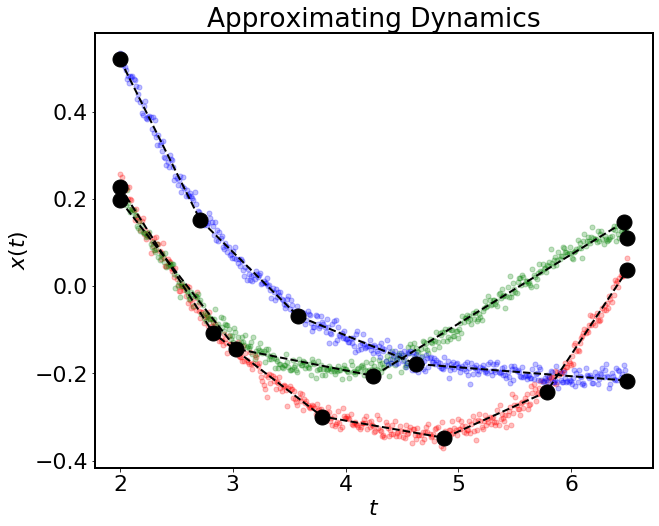

In [7]:
fig = plt.figure(figsize=(10,8))

# chosen_obs = [109, 8]

chosen_obs = [0, 1, 499]  #7]
colors = ['r', 'g', 'b']

for i, c in zip(chosen_obs,colors):
    plt.plot(learn.times[time_start_idx:time_end_idx+1], learn.observed_time_series[i,time_start_idx:time_end_idx+1],color=c, linestyle='none', marker='.', markersize=10, alpha=0.25)
    
for i in chosen_obs:
    num_i_knots = int(0.5*(2+len(learn.obs_knots[i])))
    knots = np.copy(learn.obs_knots[i][num_i_knots:])
    knots = np.insert(knots, 0, learn.clean_times[0])
    knots = np.append(knots, learn.clean_times[-1])
    plt.plot(knots, learn.obs_knots[i][:num_i_knots], 'k', linestyle='dashed', markersize=15, marker='o', linewidth=2)
    
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.title('Approximating Dynamics') 

Text(0.5, 1.0, 'Generating Clean Data')

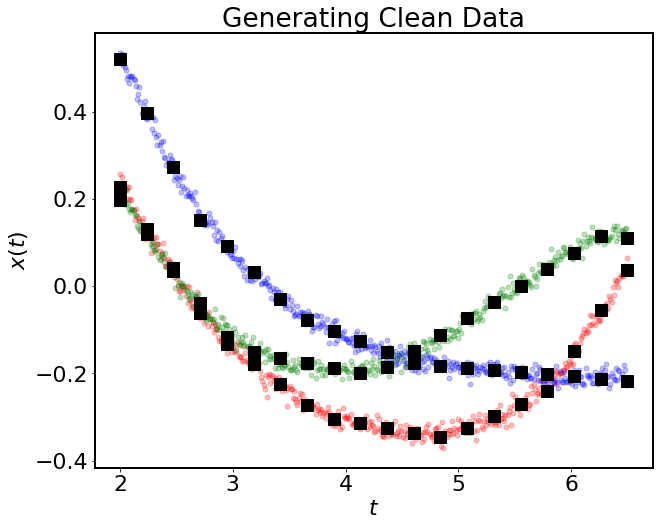

In [8]:
fig = plt.figure(figsize=(10,8))

for i, c in zip(chosen_obs,colors):
    plt.plot(learn.times[time_start_idx:time_end_idx+1], learn.observed_time_series[i,time_start_idx:time_end_idx+1],color=c, linestyle='none', marker='.', markersize=10, alpha=0.25)
    
for i in chosen_obs:
    plt.plot(learn.clean_times, learn.clean_obs[i,:],'k', linestyle='none', marker='s', 
            markersize=12)
    
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.title('Generating Clean Data') 

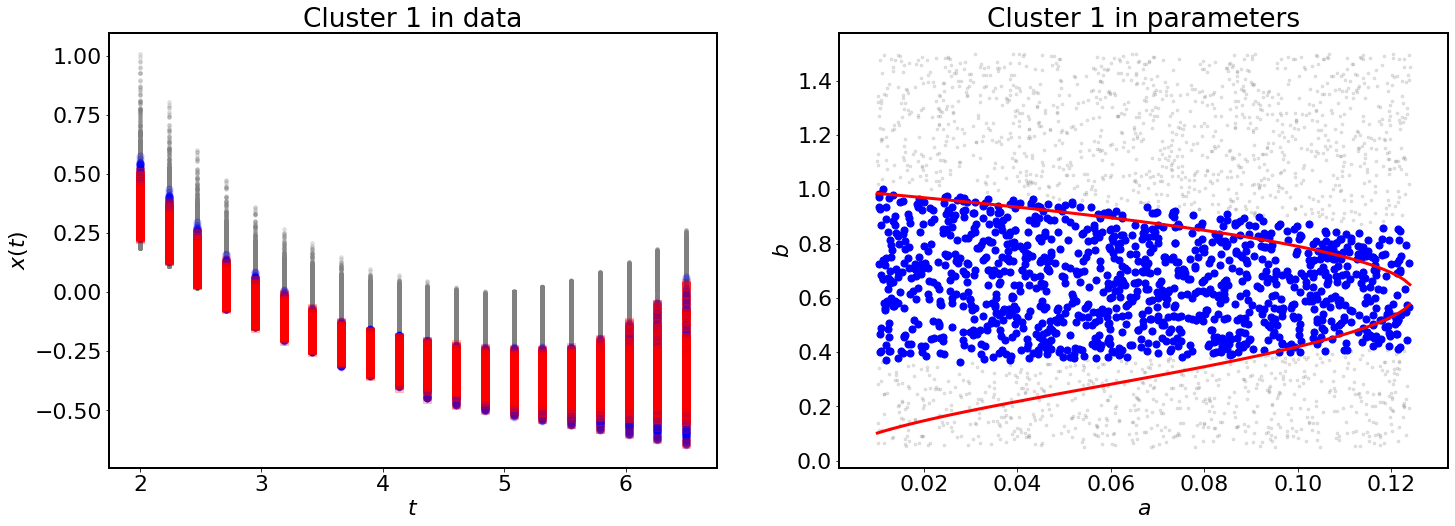

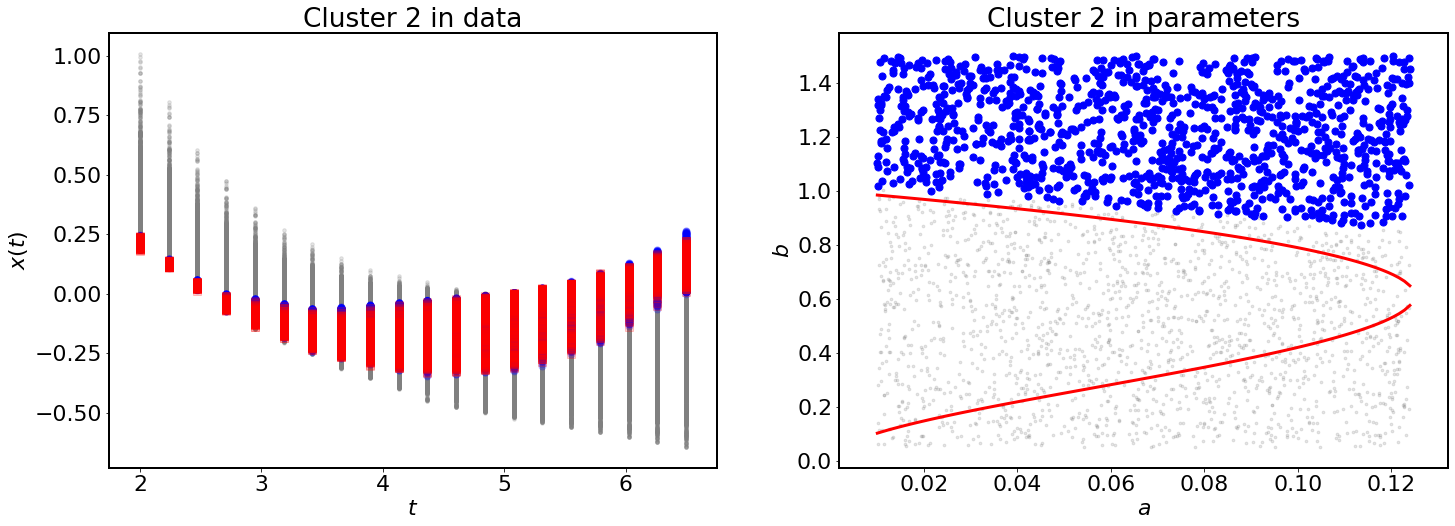

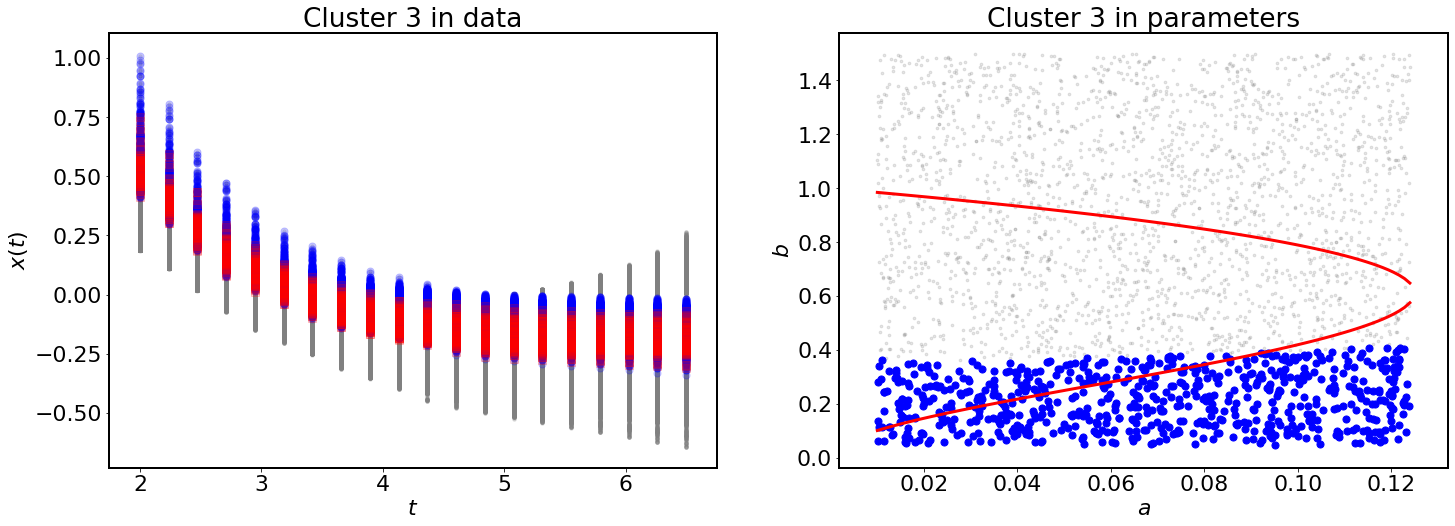

In [9]:
# # Plot clusters of predicted time series
num_clean_obs = learn.clean_times.shape[0]
for j in range(learn.num_clusters):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,8), gridspec_kw={'width_ratios': [1, 1]}) 
    ax1.scatter(np.tile(learn.clean_times,num_samples).reshape(num_samples, num_clean_obs), 
                learn.clean_predictions, 50, c='gray', marker='.', alpha=0.2)
    idx = np.where(learn.predict_labels == j)[0]
    ax1.scatter(np.tile(learn.clean_times,len(idx)).reshape(len(idx),num_clean_obs), 
                learn.clean_predictions[idx,:], 50, c='b', marker='o', alpha=0.2)
    idx2 = np.where(learn.obs_labels == j)[0]    
    ax1.scatter(np.tile(learn.clean_times,len(idx2)).reshape(len(idx2),num_clean_obs), 
                learn.clean_obs[idx2, :], 50, c='r', marker='s', alpha=0.2)
    ax1.set(title='Cluster ' + str(j+1) + ' in data')
    ax1.set_xlabel('$t$')
    ax1.set_ylabel('$x(t)$')
    
    ax2.scatter(params[:,0], params[:,1], 30, c='gray', marker='.', alpha=0.2)
    ax2.scatter(params[idx,0], params[idx,1], 50, c='blue', marker='o')
    ax2.set(title='Cluster ' + str(j+1) + ' in parameters')
    ax2.set_ylabel(param_labels[1])
    ax2.set_xlabel(param_labels[0])
    xs = np.linspace(param_range[0,0], param_range[0,1], 100)
    ys1 = np.sqrt(0.5*(1.0 - np.sqrt(1.0 - 8.0*xs) -2.0*xs))
    ys2 = np.sqrt(0.5*(1.0 + np.sqrt(1.0 - 8.0*xs) -2.0*xs))
    ax2.plot(xs, ys1, 'r-', linewidth=3)
    ax2.plot(xs, ys2, 'r-', linewidth=3)
    fig.tight_layout
# for j in range(learn.num_clusters):
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,8), gridspec_kw={'width_ratios': [1, 1]}) 
#     ps = []
#     idx = np.where(learn.predict_labels == j)[0]
#     for i in range(num_samples):
#         if learn.predict_labels[i] == j:
#             ps.append(params[i,0]/params[i,1])
#             ax1.scatter(learn.clean_times, learn.clean_predictions[i,:], 50, c='b', marker='o', alpha=0.2)
#         else:
#             ax1.scatter(learn.clean_times, learn.clean_predictions[i,:], 50, c='gray', marker='.', alpha=0.2)
#     ax1.set(title='Cluster ' + str(j+1) + ' in data')
#     ax1.set_xlabel('$t$')
#     ax1.set_ylabel('$y(t)$')
#     for i in range(num_samples):
#         if learn.predict_labels[i] == j:
#             ax2.scatter(params[i,0], params[i,1], 50, c='blue', marker='o')
#         else:
#             ax2.scatter(params[i,0], params[i,1], 30, c='gray', marker='.', alpha=0.2)
#     ax2.set(title='Cluster ' + str(j+1) + ' in parameters')
#     ax2.set_ylabel(param_labels[1])
#     ax2.set_xlabel(param_labels[0])
#     xs = np.linspace(param_range[0,0], param_range[0,1], 100)
#     ys1 = np.sqrt(0.5*(1.0 - np.sqrt(1.0 - 8.0*xs) -2.0*xs))
#     ys2 = np.sqrt(0.5*(1.0 + np.sqrt(1.0 - 8.0*xs) -2.0*xs))
#     ax2.plot(xs, ys1, 'r-')
#     ax2.plot(xs, ys2, 'r-')
#     fig.tight_layout

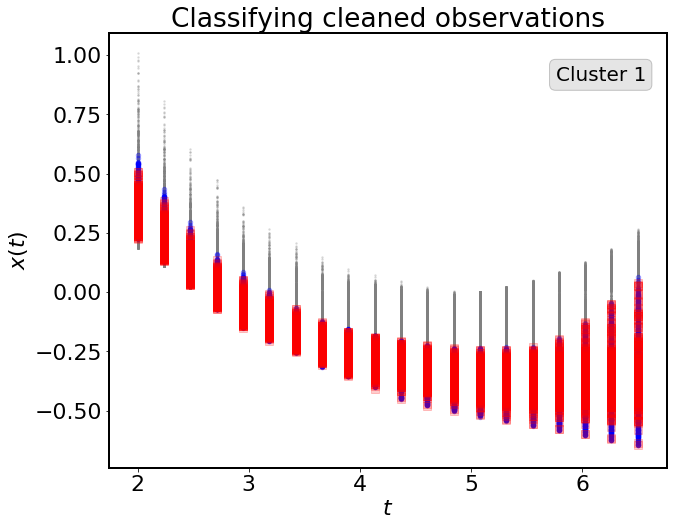

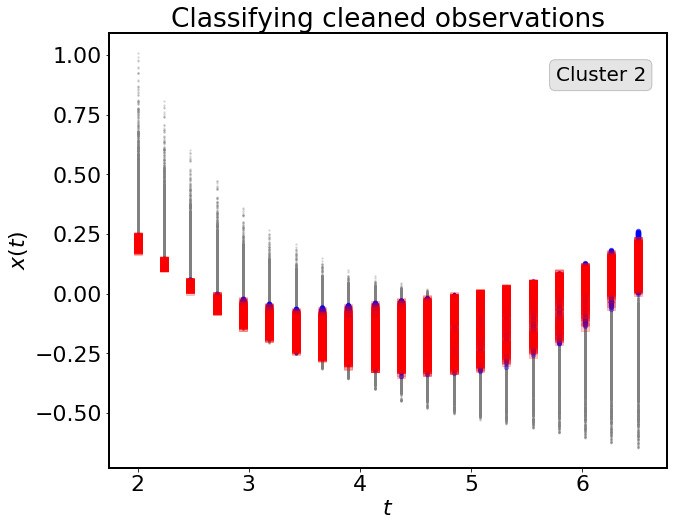

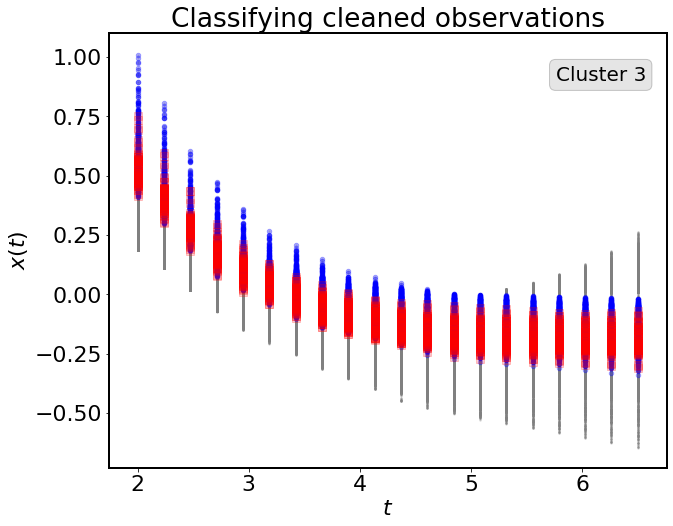

In [10]:
## # Plot oberved and predicted clusters

for j in range(learn.num_clusters):
    fig = plt.figure(figsize=(10,8))
    plt.scatter(np.tile(learn.clean_times,num_samples).reshape(num_samples,num_clean_obs), 
                learn.clean_predictions, 10, c='gray', marker='.', alpha=0.2)
    idx = np.where(learn.predict_labels == j)[0]
    plt.scatter(np.tile(learn.clean_times,len(idx)).reshape(len(idx),num_clean_obs), 
                learn.clean_predictions[idx,:], 20, c='b', marker='o', alpha=0.3)
    idx = np.where(learn.obs_labels == j)[0]    
    plt.scatter(np.tile(learn.clean_times,len(idx)).reshape(len(idx),num_clean_obs), 
                learn.clean_obs[idx, :], 50, c='r', marker='s', alpha=0.2)
    plt.title('Classifying cleaned observations')
    plt.xlabel('$t$')
    plt.ylabel('$x(t)$')
    bottom, top = plt.gca().get_ylim()
    left, right = plt.gca().get_xlim()

    props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
    plt.text(right-1, top-0.2, 
             'Cluster ' + str(j+1), 
             {'color': 'k', 'fontsize': 20},
             bbox=props)
    plt.text
    fig.tight_layout

# for j in range(learn.num_clusters):
#     fig = plt.figure(figsize=(10,8))
#     ps = []
#     for i in range(num_samples):
#         if learn.predict_labels[i] == j:
#             ps.append(params[i,0]/params[i,1])
#             plt.scatter(learn.clean_times, learn.clean_predictions[i,:], 50, c='b', marker='.', alpha=0.2)
#         else:
#             plt.scatter(learn.clean_times, learn.clean_predictions[i,:], 20, c='gray', marker='.', alpha=0.2)
#     for i in range(num_obs):        
#         if learn.obs_labels[i] == j:
#             plt.scatter(learn.clean_times, learn.clean_obs[i, :], 50, c='r', marker='o', alpha=0.2)
#     plt.title('Classifying cleaned observations')
#     plt.xlabel('$t$')
#     plt.ylabel('$y(t)$')
#     bottom, top = plt.gca().get_ylim()
#     left, right = plt.gca().get_xlim()
#     props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
#     plt.text(right-1, top-0.2, 
#              'Cluster ' + str(j+1), 
#              {'color': 'k', 'fontsize': 20},
#              bbox=props)
#     plt.text
#     fig.tight_layout

In [11]:
# # Plot clusters of predicted time series
# for j in range(learn.num_clusters):
#     fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,2.5), 
#                                         gridspec_kw={'width_ratios': [3,1,1]}) 
#     ps = []
#     ps2 = []
#     for i in range(num_samples):
#         if learn.predict_labels[i] == j:
#             a = params[i, 0]
#             b = params[i, 1]
#             b1 = sqrt((1.0-sqrt(1.-8.*a)-2.*a)/2.0)
#             b2 = sqrt((1.0+sqrt(1.-8.*a)-2.*a)/2.0)
#             ps.append(b/b1)
#             ps2.append(b/b2)
#             ax1.plot(learn.clean_times, learn.clean_predictions[i, :])
#     ax1.set(title='Cluster ' + str(j))
#     xs = np.linspace(0.0, 5.0, 100)
#     ax2.plot(xs, GKDE(ps)(xs))
#     ax2.axvline(1.0, color='r')
#     ax2.set(xlabel=r'$b/b_1$', title='Param. Distrib.')
#     xs2 = np.linspace(0.0, 2.0, 100)
#     ax3.plot(xs2, GKDE(ps2)(xs2))
#     ax3.axvline(1.0, color='r')
#     ax3.set(xlabel=r'$b/b_2$', title='Param. Distrib.')

In [12]:
# # Plot oberved and predicted clusters
# for j in range(learn.num_clusters):
#     plt.figure()
#     cluster_num = j
#     for i in range(num_samples):
#         if learn.predict_labels[i] == cluster_num:
#             plt.plot(learn.clean_times, learn.clean_predictions[i,:],'b*')
#     for i in range(num_obs):
#         if learn.obs_labels[i] == cluster_num:
#             plt.plot(learn.clean_times, learn.clean_obs[i,:],'ro')

In [13]:
# Find best KPCA transformation for given number of QoI and transform time series data.
predict_map, obs_map = learn.learn_qois_and_transform(num_qoi=2)

2 principal components explain 98.9931% of variance for cluster 0 with {'kernel': 'linear'}
2 principal components explain 53.4284% of variance for cluster 0 with {'kernel': 'rbf'}
2 principal components explain 93.9117% of variance for cluster 0 with {'kernel': 'sigmoid'}
2 principal components explain 78.9227% of variance for cluster 0 with {'kernel': 'poly'}
2 principal components explain 97.7503% of variance for cluster 0 with {'kernel': 'cosine'}
Best kPCA for cluster  0  is  {'kernel': 'linear'}
2 principal components explain 98.9931% of variance.
2 principal components explain 95.5635% of variance for cluster 1 with {'kernel': 'linear'}
2 principal components explain 63.9280% of variance for cluster 1 with {'kernel': 'rbf'}
2 principal components explain 96.1916% of variance for cluster 1 with {'kernel': 'sigmoid'}
2 principal components explain 82.2818% of variance for cluster 1 with {'kernel': 'poly'}
2 principal components explain 92.0688% of variance for cluster 1 with {'ker

In [14]:
%reset -f out

def plot_gap(all_eig_vals, n, cluster):
    fig = plt.figure(figsize=(10,10))
    fig.clear()
    #Plotting until maximum number of knots
    eig_vals = all_eig_vals[cluster].lambdas_[0:10]
    plt.semilogy(np.arange(np.size(eig_vals))+1,eig_vals/np.sum(eig_vals)*100, Marker='.', MarkerSize=20, linestyle='')
    plt.semilogy(np.arange(np.size(eig_vals))+1,eig_vals[n]/np.sum(eig_vals)*100*np.ones(np.size(eig_vals)), 'k--')
    plt.semilogy(np.arange(np.size(eig_vals))+1,eig_vals[n+1]/np.sum(eig_vals)*100*np.ones(np.size(eig_vals)), 'r--')
    plt.text(n+1, eig_vals[n]/np.sum(eig_vals)*150, 
             r'%2.3f' %(np.sum(eig_vals[0:n+1])/np.sum(eig_vals)*100) + '% of variation explained by first ' + '%1d' %(n+1) + ' PCs.', 
                                                               {'color': 'k', 'fontsize': 20})
    plt.text(n+2, eig_vals[n+1]/np.sum(eig_vals)*150, 
             r'Order of magnitude of gap is %4.2f.' %(np.log10(eig_vals[n])-np.log10(eig_vals[n+1])), 
                                                               {'color': 'r', 'fontsize': 20})
    s = 'Determining QoI for cluster #%1d' %(cluster+1)
    plt.title(s)
    plt.xlabel('Principal Component #')
    plt.ylabel('% of Variation')
    plt.xlim([0.1, np.size(eig_vals)+1])
    plt.ylim([0,500])


wd.interact(plot_gap, all_eig_vals=wd.fixed(learn.kpcas),
            n = wd.IntSlider(value=0, min=0, max=5),
            cluster = wd.IntSlider(value=0, min=0, max=learn.num_clusters-1))

Flushing output cache (3 entries)


interactive(children=(IntSlider(value=0, description='n', max=5), IntSlider(value=0, description='cluster', ma…

<function __main__.plot_gap(all_eig_vals, n, cluster)>

In [15]:
# Generate kernel density estimates on new QoI
learn.generate_kdes()
# Calculate rejection rates for each cluster and print averages.
r_vals = learn.compute_r()

Diagnostic for clusters [sample average of ratios in each cluster]: [0.985614587901707, 0.949305975277837, 1.0201290145378241]


In [16]:
# Compute marginal probablities for each parameter and initial condition.
param_marginals = []
ic_marginals = []
true_param_marginals = []
true_ic_marginals = []
lam_ptr = []
cluster_weights = []
for i in range(learn.num_clusters):
    lam_ptr.append(np.where(learn.predict_labels == i)[0])
    cluster_weights.append(len(np.where(learn.obs_labels == i)[0]) / num_obs)

for i in range(params.shape[1]):
    true_param_marginals.append(GKDE(params_obs[:,i]))
    param_marginals.append([])
    for j in range(learn.num_clusters):
        param_marginals[i].append(GKDE(params[lam_ptr[j], i], weights=learn.r[j]))
        
##for i in range(ics.shape[1]):
#    true_ic_marginals.append(GKDE(ics_obs[:,i]))
#    ic_marginals.append([])
#    for j in range(learn.num_clusters):
#        ic_marginals[i].append(GKDE(ics[lam_ptr[j], i], weights=learn.r[j]))

In [17]:
# uniform distribution
def unif_dist(x, p_range):
    y = np.zeros(x.shape)
    val = 1.0/(p_range[1] - p_range[0])
    for i, xi in enumerate(x):
        if xi < p_range[0] or xi >  p_range[1]:
            y[i] = 0
        else:
            y[i] = val
    return y

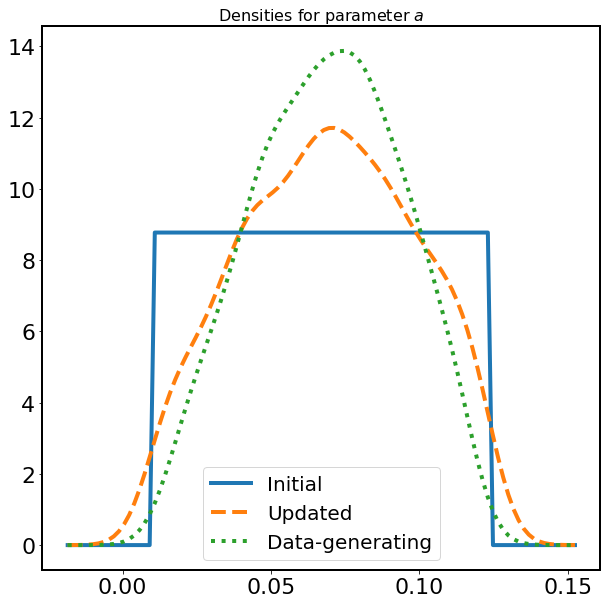

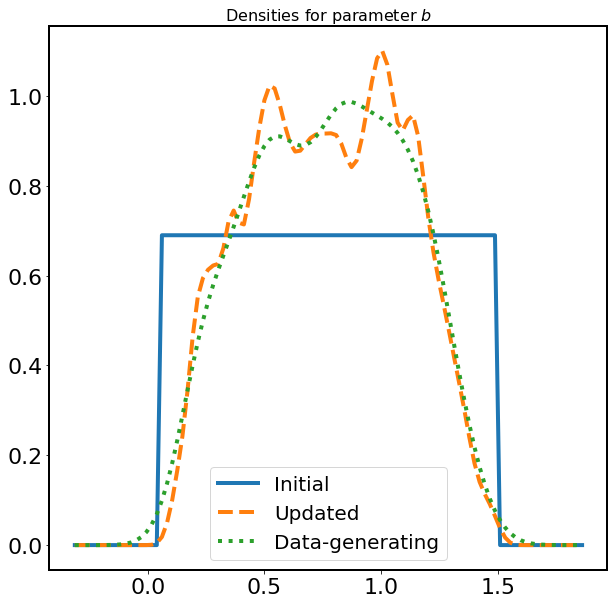

In [18]:
# Plot predicted marginal densities for parameters

for i in range(params.shape[1]):  
    fig = plt.figure(figsize=(10,10))
    fig.clear()
    x_min = min(min(params[:, i]), min(params_obs[:, i]))
    x_max = max(max(params[:, i]), max(params_obs[:, i]))
    delt = 0.25*(x_max - x_min)
    x = np.linspace(x_min-delt, x_max+delt, 100)
    plt.plot(x, unif_dist(x, param_range[i, :]),
         label = 'Initial', linewidth=4)
    mar = np.zeros(x.shape)
    for j in range(learn.num_clusters):
        mar += param_marginals[i][j](x) * cluster_weights[j]
    plt.plot(x, mar, label = 'Updated', linewidth=4, linestyle='dashed')
    plt.plot(x, true_param_marginals[i](x), label = 'Data-generating', 
             linewidth=4, linestyle='dotted')
    plt.title('Densities for parameter ' + param_labels[i], fontsize=16)
    plt.legend(fontsize=20)
    if i == 0:
        plt.xticks([0, 0.05, 0.1, 0.15])
    else:
        plt.xticks([0, 0.5, 1., 1.5])

    

In [19]:
# # Plot predicted marginal densities for initial conditions.

# for i in range(ics.shape[1]):
#     fig = plt.figure(figsize=(10,10))
#     fig.clear()
#     x_min = min(min(ics[:, i]), min(ics_obs[:, i]))
#     x_max = max(max(ics[:, i]), max(ics_obs[:, i]))
#     delt = 0.25*(x_max - x_min)
#     x = np.linspace(x_min-delt, x_max+delt, 100)
#     plt.plot(x, unif_dist(x, ic_range[i, :]),
#          label = 'Initial guess')
#     mar = np.zeros(x.shape)
#     for j in range(learn.num_clusters):
#         mar += ic_marginals[i][j](x) * cluster_weights[j]
#     plt.plot(x, mar, label = 'Estimated pullback')
#     plt.plot(x, true_ic_marginals[i](x), label = 'Actual density')
#     plt.title('Comparing pullback to actual density of initial condition ' + ic_labels[i], fontsize=16)
#     plt.legend(fontsize=20)

### Compute TV metric between densities

In [20]:
import scipy.integrate.quadrature as quad

In [21]:
def param_init_error(x):
    return np.abs(unif_dist(x,param_range[param_num, :])-true_param_marginals[param_num](x))

for i in range(params.shape[1]):
    param_num=i
    TV_metric = quad(param_init_error,param_range[i,0],param_range[i,1],maxiter=1000)
    print(TV_metric)

(0.4083628635477685, 5.872983488419692e-09)
(0.36166797673298867, 2.9112803834330236e-09)


In [22]:
def param_update_KDE_error(x):
    mar = np.zeros(x.shape)
    for j in range(learn.num_clusters):
        mar += param_marginals[param_num][j](x) * cluster_weights[j]
    return np.abs(mar-true_param_marginals[param_num](x))

for i in range(params.shape[1]):
    param_num=i
    TV_metric = quad(param_update_KDE_error,param_range[i,0],param_range[i,1],maxiter=1000)
    print(TV_metric)

(0.1707132216005714, 1.3811807558772315e-08)
(0.07695687792720578, 8.386514580016602e-09)


In [23]:
from scipy.stats import beta 

In [24]:
def KDE_error(x):
    true_beta = beta(a=true_a, b=true_b,loc=param_range[i,0],scale=param_range[i,1]-param_range[i,0])
    return np.abs(true_beta.pdf(x)-true_param_marginals[param_num](x))

for i in range(params.shape[1]):
    param_num=i
    TV_metric = quad(KDE_error,param_range[i,0],param_range[i,1],maxiter=1000)
    print(TV_metric)

(0.07520973221639927, 8.898024581038833e-09)
(0.060452977119108485, 8.352453881310673e-09)
